# IMPORTING LIBRARIES

In [227]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

# LOADING DATA

In [2]:
df = pd.read_csv("Preprocessed_without_scaling_data_train.csv")
df_sc = pd.read_csv("Preprocessed_with_scaling_data_train.csv")               

# MODEL CREATION

In [3]:
# SPLITTING X AND Y
X,y = df.iloc[:,:-1],df.iloc[:,-1]
X_sc,y_sc = df_sc.iloc[:,:-1],df_sc.iloc[:,-1]

In [4]:
X

Unnamed: 0  Age  Gender  DistanceFromHome  EmpEducationLevel  \
0             0   42       0                26                  5   
1             1   58       0                 1                  3   
2             2   53       1                24                  4   
3             3   31       0                20                  3   
4             4   31       0                 7                  2   
..          ...  ...     ...               ...                ...   
955         955   34       1                 9                  3   
956         956   45       1                 1                  4   
957         957   25       1                19                  2   
958         958   58       1                 2                  3   
959         959   34       1                 1                  2   

     EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
0                             1             60                  3   
1                             4             76                  3   
2                             1             66                  3   
3                             2             71                  1   
4                             2             31                  3   
..                          ...            ...                ...   
955                           4             86                  3   
956                           1             66                  3   
957                           3             36                  2   
958                           2             52                  3   
959                           1             94                  3   

     EmpJobLevel  EmpJobSatisfaction  ...  EmpJobRole_Research Scientist  \
0              3                   1  ...                            0.0   
1              5                   1  ...                            0.0   
2              3                   1  ...                            0.0   
3              2                   3  ...                            0.0   
4              2                   1  ...                            0.0   
..           ...                 ...  ...                            ...   
955            3                   4  ...                            0.0   
956            3                   2  ...                            0.0   
957            1                   2  ...                            0.0   
958            4                   2  ...                            0.0   
959            2                   2  ...                            0.0   

     EmpJobRole_Sales Executive  EmpJobRole_Sales Representative  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           1.0                              0.0   
3                           1.0                              0.0   
4                           0.0                              0.0   
..                          ...                              ...   
955                         0.0                              0.0   
956                         0.0                              0.0   
957                         0.0                              1.0   
958                         0.0                              0.0   
959                         0.0                              0.0   

     EmpJobRole_Senior Developer  EmpJobRole_Senior Manager R&D  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
..                           ...                            ...   
955                          0.0                            0.0   
956                          0.0                            0.0   
957           

In [5]:
y

0      3
1      4
2      2
3      2
4      3
      ..
955    3
956    2
957    3
958    2
959    3
Name: performance_rating, Length: 960, dtype: int64

# TRAIN TEST SPLIT

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train_sc,X_test_sc,y_train_sc,y_test_sc = train_test_split (X_sc,y_sc,test_size=0.2,random_state=5,stratify=y)

# MODEL 1 - RANDOM FOREST

In [7]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=4,n_jobs=-1,class_weight='balanced',min_impurity_decrease=1e-9,random_state=5)

In [8]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_impurity_decrease=1e-09, n_estimators=500, n_jobs=-1,
                       random_state=5)

In [9]:
y_pred_train = rfc.predict(X_train)

In [10]:
y_pred_test = rfc.predict(X_test)

# FEATURE IMPORTANCE

In [11]:
feat_imp = pd.DataFrame(data=rfc.feature_importances_,index=rfc.feature_names_in_,columns=['importance'])

In [12]:
feat_imp.sort_values('importance',ascending=False)

importance
EmpLastSalaryHikePercent                     0.242438
EmpEnvironmentSatisfaction                   0.226790
YearsSinceLastPromotion                      0.101674
ExperienceYearsInCurrentRole                 0.054339
EmpDepartment_Development                    0.049148
ExperienceYearsAtThisCompany                 0.038100
EmpHourlyRate                                0.027126
YearsWithCurrManager                         0.026247
EmpJobRole_Developer                         0.022403
TotalWorkExperienceInYears                   0.021725
EmpWorkLifeBalance                           0.018039
Age                                          0.017574
Unnamed: 0                                   0.016921
DistanceFromHome                             0.013199
EmpJobSatisfaction                           0.007969
NumCompaniesWorked                           0.007468
TrainingTimesLastYear                        0.006936
EmpEducationLevel                            0.006765
EmpJobLevel                                  0.006312
EmpJobInvolvement                            0.005733
EmpRelationshipSatisfaction                  0.005302
OverTime                                     0.005223
EmpDepartment_Sales                          0.005161
EmpJobRole_Research Scientist                0.004217
BusinessTravelFrequency_Travel_Frequently    0.004144
EmpDepartment_Research & Development         0.003988
EmpJobRole_Business Analyst                  0.003429
EmpJobRole_Sales Representative              0.003325
EmpJobRole_Technical Lead                    0.003273
Attrition                                    0.002930
BusinessTravelFrequency_Travel_Rarely        0.002867
MaritalStatus_Single                         0.002714
MaritalStatus_Married                        0.002586
EmpJobRole_Manager                           0.002421
EmpJobRole_Finance Manager                   0.002367
EmpJobRole_Sales Executive                   0.002357
BusinessTravelFrequency_Non-Travel           0.002222
MaritalStatus_Divorced                       0.002181
EducationBackground_Other                    0.001954
EmpJobRole_Healthcare Representative         0.001772
EmpDepartment_Finance                        0.001739
EmpJobRole_Senior Developer                  0.001704
EducationBackground_Medical                  0.001567
Gender                                       0.001542
EducationBackground_Life Sciences            0.001478
EmpDepartment_Human Resources                0.001379
EmpJobRole_Manager R&D                       0.001343
EmpJobRole_Laboratory Technician             0.001335
EducationBackground_Marketing                0.001332
EducationBackground_Technical Degree         0.001038
EmpJobRole_Human Resources                   0.000978
EducationBackground_Human Resources          0.000731
EmpJobRole_Data Scientist                    0.000596
EmpJobRole_Research Director                 0.000588
EmpJobRole_Manufacturing Director            0.000530
EmpJobRole_Senior Manager R&D                0.000369
EmpDepartment_Data Science                   0.000293
EmpJobRole_Technical Architect               0.000069
EmpJobRole_Delivery Manager                  0.000051

# EVALUATION

### TRAIN

In [13]:
accuracy_score(y_train,y_pred_train)

0.9244791666666666

In [14]:
f1_score(y_train,y_pred_train,average='macro')

0.8897889350284384

In [15]:
precision_score(y_train,y_pred_train,average='macro')

0.8666659657894241

In [16]:
recall_score(y_train,y_pred_train,average='macro')

0.9171437655794038

### TEST

In [17]:
accuracy_score(y_test,y_pred_test)

0.9010416666666666

In [18]:
f1_score(y_test,y_pred_test,average='macro')

0.8666560492647449

In [19]:
precision_score(y_test,y_pred_test,average='macro')

0.8398643667993513

In [20]:
recall_score(y_test,y_pred_test,average='macro')

0.899411162314388

In [21]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           2       0.85      0.97      0.90       124
           3       0.97      0.92      0.95       559
           4       0.78      0.86      0.82        85

    accuracy                           0.92       768
   macro avg       0.87      0.92      0.89       768
weighted avg       0.93      0.92      0.93       768



In [22]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           2       0.76      0.84      0.80        31
           3       0.95      0.91      0.93       140
           4       0.80      0.95      0.87        21

    accuracy                           0.90       192
   macro avg       0.84      0.90      0.87       192
weighted avg       0.91      0.90      0.90       192



# HYPERPARAMETER TUNING

In [23]:
# Initialize  RandomForestClassifier model
rf = RandomForestClassifier(n_jobs=-1,class_weight='balanced',bootstrap = True)

In [24]:
param_grid = {
    'max_depth': [i for i in range(8,12)],
    'max_features': [i for i in range(4,13,2)],
    'n_estimators': [400, 200, 300, 1000]
}

In [25]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 10)

In [26]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3; 1/80] START max_depth=8, max_features=4, n_estimators=400..............
[CV 1/3; 1/80] END max_depth=8, max_features=4, n_estimators=400;, score=0.863 total time=   1.0s
[CV 2/3; 1/80] START max_depth=8, max_features=4, n_estimators=400..............
[CV 2/3; 1/80] END max_depth=8, max_features=4, n_estimators=400;, score=0.902 total time=   0.9s
[CV 3/3; 1/80] START max_depth=8, max_features=4, n_estimators=400..............
[CV 3/3; 1/80] END max_depth=8, max_features=4, n_estimators=400;, score=0.879 total time=   1.0s
[CV 1/3; 2/80] START max_depth=8, max_features=4, n_estimators=200..............
[CV 1/3; 2/80] END max_depth=8, max_features=4, n_estimators=200;, score=0.859 total time=   0.5s
[CV 2/3; 2/80] START max_depth=8, max_features=4, n_estimators=200..............
[CV 2/3; 2/80] END max_depth=8, max_features=4, n_estimators=200;, score=0.891 total time=   0.4s
[CV 3/3; 2/80] START max_depth=8, max_featu

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=1,
             param_grid={'max_depth': [8, 9, 10, 11],
                         'max_features': [4, 6, 8, 10, 12],
                         'n_estimators': [400, 200, 300, 1000]},
             verbose=10)

In [27]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 8, 'max_features': 12, 'n_estimators': 1000}


In [28]:
best_grid_rf = RandomForestClassifier(max_depth=9,max_features=12,n_estimators=200,bootstrap=True,n_jobs=-1,class_weight='balanced')

In [29]:
best_grid_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=12,
                       n_estimators=200, n_jobs=-1)

In [30]:
y_pred_train =  best_grid_rf.predict(X_train)

In [31]:
y_pred_test = best_grid_rf.predict(X_test)

# EVALUATION

### TRAIN

In [32]:
accuracy_score(y_train,y_pred_train)

0.9856770833333334

In [33]:
f1_score(y_train,y_pred_train,average='macro')

0.9825307304982102

In [34]:
precision_score(y_train,y_pred_train,average='macro')

0.9728395061728395

In [35]:
recall_score(y_train,y_pred_train,average='macro')

0.9934406678592724

### TEST

In [36]:
accuracy_score(y_test,y_pred_test)

0.9375

In [37]:
f1_score(y_test,y_pred_test,average='macro')

0.9106171606171606

In [38]:
precision_score(y_test,y_pred_test,average='macro')

0.936912372254838

In [39]:
recall_score(y_test,y_pred_test,average='macro')

0.8909626216077827

The train and test accuracy exhibit a difference, it decreased from 98% to 93%.Additionally, other metrics such as F1 score, precision score, and recall score also vary.

# MODEL 2 DECISION TREE

In [40]:
dtree = DecisionTreeClassifier(max_depth=8,class_weight='balanced',criterion = "gini", splitter = "best")

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

In [42]:
y_pred_train = dtree.predict(X_train)

In [43]:
y_pred_test = dtree.predict(X_test)

# FEATURE IMPORTANCE

In [44]:
feat_imp = pd.DataFrame(data=dtree.feature_importances_,index=dtree.feature_names_in_,columns=['importance'])

In [45]:
feat_imp.sort_values('importance',ascending=False)

importance
EmpLastSalaryHikePercent                   3.032389e-01
EmpEnvironmentSatisfaction                 2.794556e-01
YearsSinceLastPromotion                    1.473066e-01
ExperienceYearsInCurrentRole               8.153683e-02
EmpWorkLifeBalance                         5.023216e-02
EmpJobRole_Developer                       3.012098e-02
EmpRelationshipSatisfaction                1.426351e-02
EmpDepartment_Development                  1.367080e-02
YearsWithCurrManager                       1.294200e-02
BusinessTravelFrequency_Travel_Rarely      1.287957e-02
TrainingTimesLastYear                      9.203129e-03
OverTime                                   7.274750e-03
Unnamed: 0                                 7.236519e-03
Gender                                     7.118345e-03
EducationBackground_Life Sciences          5.990553e-03
NumCompaniesWorked                         4.846742e-03
EducationBackground_Medical                4.349128e-03
Age                                        3.381389e-03
EmpJobSatisfaction                         3.283818e-03
BusinessTravelFrequency_Travel_Frequently  1.668689e-03
EmpDepartment_Human Resources              1.974439e-16
EmpJobRole_Manager                         2.921320e-17
EmpJobRole_Sales Executive                 4.860157e-18
EmpJobRole_Data Scientist                  2.430079e-18
EmpJobRole_Sales Representative            0.000000e+00
EmpJobRole_Senior Developer                0.000000e+00
EmpJobRole_Delivery Manager                0.000000e+00
EmpJobRole_Research Director               0.000000e+00
EmpJobRole_Manufacturing Director          0.000000e+00
EmpJobRole_Senior Manager R&D              0.000000e+00
EmpJobRole_Manager R&D                     0.000000e+00
EmpJobRole_Technical Architect             0.000000e+00
EmpJobRole_Laboratory Technician           0.000000e+00
EmpJobRole_Human Resources                 0.000000e+00
EmpJobRole_Technical Lead                  0.000000e+00
EmpJobRole_Healthcare Representative       0.000000e+00
EmpJobRole_Finance Manager                 0.000000e+00
BusinessTravelFrequency_Non-Travel         0.000000e+00
EmpJobRole_Research Scientist              0.000000e+00
EmpDepartment_Sales                        0.000000e+00
EmpJobRole_Business Analyst                0.000000e+00
EducationBackground_Marketing              0.000000e+00
EmpJobLevel                                0.000000e+00
ExperienceYearsAtThisCompany               0.000000e+00
EmpJobInvolvement                          0.000000e+00
EmpHourlyRate                              0.000000e+00
EmpEducationLevel                          0.000000e+00
Attrition                                  0.000000e+00
EducationBackground_Human Resources        0.000000e+00
EducationBackground_Other                  0.000000e+00
TotalWorkExperienceInYears                 0.000000e+00
EducationBackground_Technical Degree       0.000000e+00
MaritalStatus_Divorced                     0.000000e+00
MaritalStatus_Single                       0.000000e+00
EmpDepartment_Data Science                 0.000000e+00
DistanceFromHome                           0.000000e+00
EmpDepartment_Finance                      0.000000e+00
EmpDepartment_Research & Development       0.000000e+00
MaritalStatus_Married                      0.000000e+00

# EVALUATION

### TRAIN

In [46]:
accuracy_score(y_train,y_pred_train)

0.9856770833333334

In [47]:
f1_score(y_train,y_pred_train,average='macro')

0.9811386239120035

In [48]:
precision_score(y_train,y_pred_train,average='macro')

0.9697807737735142

In [49]:
recall_score(y_train,y_pred_train,average='macro')

0.9934406678592724

### TEST

In [50]:
accuracy_score(y_test,y_pred_test)

0.90625

In [51]:
f1_score(y_test,y_pred_test,average='macro')

0.8704906204906205

In [52]:
precision_score(y_test,y_pred_test,average='macro')

0.8661276504604841

In [53]:
recall_score(y_test,y_pred_test,average='macro')

0.8766769073220685

In [54]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           2       0.93      1.00      0.96       124
           3       1.00      0.98      0.99       559
           4       0.98      1.00      0.99        85

    accuracy                           0.99       768
   macro avg       0.97      0.99      0.98       768
weighted avg       0.99      0.99      0.99       768



In [55]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           2       0.79      0.74      0.77        31
           3       0.94      0.94      0.94       140
           4       0.87      0.95      0.91        21

    accuracy                           0.91       192
   macro avg       0.87      0.88      0.87       192
weighted avg       0.91      0.91      0.91       192



# HYPERPARAMETER TUNING

In [56]:
# Initialize a decision tree classifier
dtree_classifier = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [57]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=dtree_classifier, param_grid=param_grid, cv=5, scoring='accuracy',verbose=10)

In [59]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_depth=10, min_samples_leaf=1, min_samples_split=2......
[CV 1/5; 1/36] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.870 total time=   0.0s
[CV 2/5; 1/36] START max_depth=10, min_samples_leaf=1, min_samples_split=2......
[CV 2/5; 1/36] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.922 total time=   0.0s
[CV 3/5; 1/36] START max_depth=10, min_samples_leaf=1, min_samples_split=2......
[CV 3/5; 1/36] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.929 total time=   0.0s
[CV 4/5; 1/36] START max_depth=10, min_samples_leaf=1, min_samples_split=2......
[CV 4/5; 1/36] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.843 total time=   0.0s
[CV 5/5; 1/36] START max_depth=10, min_samples_leaf=1, min_samples_split=2......
[CV 5/5; 1/36] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.915 total time=   0.0s
[CV

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=10)

In [60]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [61]:
best_grid_dtree = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5,class_weight='balanced',random_state=42)

In [62]:
best_grid_dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [63]:
y_pred_train =  best_grid_dtree.predict(X_train)

In [64]:
y_pred_test = best_grid_dtree.predict(X_test)

# EVALUATION

### TRAIN

In [65]:
accuracy_score(y_train,y_pred_train)

0.9778645833333334

In [66]:
f1_score(y_train,y_pred_train,average='macro')

0.968198738631281

In [67]:
precision_score(y_train,y_pred_train,average='macro')

0.9487697738971083

In [68]:
recall_score(y_train,y_pred_train,average='macro')

0.9898628503279666

### TEST

In [69]:
accuracy_score(y_test,y_pred_test)

0.8958333333333334

In [70]:
f1_score(y_test,y_pred_test,average='macro')

0.8484703871867941

In [71]:
precision_score(y_test,y_pred_test,average='macro')

0.8467297084318361

In [72]:
recall_score(y_test,y_pred_test,average='macro')

0.8551715309779825

After hyperparameter tuning test accuracy decreases from 97% to 85%.

# MODEL 3 XGBOOST

In [73]:
XG = XGBClassifier( XGBClassifier(n_estimators=1000,learning_rate=0.1,max_depth=6,min_child_weight=5,gamma=6,reg_alpha=40,reg_lambda=14,subsample=0.9,colsample_bytree=0.8,objective='multi:softmax',nthread=-1,seed=27,n_jobs=-1))

In [74]:
XG.fit(X_train,y_train-2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [75]:
y_pred_train = XG.predict(X_train)+2

In [76]:
y_pred_test = XG.predict(X_test)+2

Here we modify the y from the range of [2,3,4] to the range of [0,1,2] by subtracting 2 from each y value so that the data is passed in the way xgboost requires it to.

# FEATURE IMPORTANCE

In [77]:
feat_imp = pd.DataFrame(data=XG.feature_importances_,index=XG.feature_names_in_,columns=['importance'])

In [78]:
feat_imp.sort_values('importance',ascending=False)

importance
YearsSinceLastPromotion                      0.112910
EmpEnvironmentSatisfaction                   0.106046
EmpDepartment_Development                    0.082586
EmpLastSalaryHikePercent                     0.081601
ExperienceYearsInCurrentRole                 0.048363
EmpJobRole_Developer                         0.045266
EmpJobRole_Manager                           0.044108
EmpDepartment_Data Science                   0.037641
EmpJobRole_Senior Developer                  0.032041
EducationBackground_Technical Degree         0.031181
EmpJobRole_Sales Representative              0.029814
BusinessTravelFrequency_Non-Travel           0.025469
EmpJobRole_Business Analyst                  0.024922
EmpWorkLifeBalance                           0.024141
EducationBackground_Marketing                0.021215
YearsWithCurrManager                         0.016755
ExperienceYearsAtThisCompany                 0.015891
BusinessTravelFrequency_Travel_Frequently    0.015330
EmpJobInvolvement                            0.014333
BusinessTravelFrequency_Travel_Rarely        0.014184
TrainingTimesLastYear                        0.013684
OverTime                                     0.013137
EmpJobRole_Research Scientist                0.012694
DistanceFromHome                             0.012314
EducationBackground_Life Sciences            0.011965
MaritalStatus_Divorced                       0.011746
EmpJobSatisfaction                           0.010606
EmpDepartment_Sales                          0.010391
EmpRelationshipSatisfaction                  0.008348
Unnamed: 0                                   0.007220
Gender                                       0.007073
EmpEducationLevel                            0.006522
EmpHourlyRate                                0.006196
Age                                          0.005769
EmpJobLevel                                  0.005756
TotalWorkExperienceInYears                   0.005300
EmpJobRole_Sales Executive                   0.005115
EducationBackground_Medical                  0.004922
EmpJobRole_Technical Lead                    0.004783
NumCompaniesWorked                           0.003829
EmpDepartment_Research & Development         0.002936
MaritalStatus_Single                         0.002644
Attrition                                    0.002593
MaritalStatus_Married                        0.000661
EmpJobRole_Human Resources                   0.000000
EmpJobRole_Healthcare Representative         0.000000
EmpJobRole_Manager R&D                       0.000000
EmpJobRole_Manufacturing Director            0.000000
EmpJobRole_Research Director                 0.000000
EmpJobRole_Finance Manager                   0.000000
EmpJobRole_Delivery Manager                  0.000000
EmpJobRole_Data Scientist                    0.000000
EducationBackground_Human Resources          0.000000
EmpJobRole_Senior Manager R&D                0.000000
EmpJobRole_Technical Architect               0.000000
EmpDepartment_Human Resources                0.000000
EmpDepartment_Finance                        0.000000
EducationBackground_Other                    0.000000
EmpJobRole_Laboratory Technician             0.000000

# EVALUATION

### TRAIN

In [79]:
accuracy_score(y_train,y_pred_train)

1.0

In [80]:
f1_score(y_train,y_pred_train,average='macro')

1.0

In [81]:
precision_score(y_train,y_pred_train,average='macro')

1.0

In [82]:
recall_score(y_train,y_pred_train,average='macro')

1.0

### TEST

In [83]:
accuracy_score(y_test,y_pred_test)

0.9375

In [84]:
f1_score(y_test,y_pred_test,average='macro')

0.9135564193330561

In [85]:
precision_score(y_test,y_pred_test,average='macro')

0.940990516332982

In [86]:
recall_score(y_test,y_pred_test,average='macro')

0.8909626216077827

In [87]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00        85

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [88]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           2       0.88      0.74      0.81        31
           3       0.94      0.98      0.96       140
           4       1.00      0.95      0.98        21

    accuracy                           0.94       192
   macro avg       0.94      0.89      0.91       192
weighted avg       0.94      0.94      0.94       192



# HYPERPARAMETER TUNING

In [89]:
# Initialize the XGBoost Classifier model
xgb_model = XGBClassifier( objective='multi:softmax', nthread=-1, seed=27, n_jobs=-1,class_weight='balanced')

In [90]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators':[200,400,600,1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [91]:
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy',verbose=10)

In [92]:
grid_search.fit(X_train, y_train-2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5; 1/324] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8
[CV 1/5; 1/324] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8;, score=0.909 total time=   0.3s
[CV 2/5; 1/324] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8
[CV 2/5; 1/324] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8;, score=0.968 total time=   0.3s
[CV 3/5; 1/324] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8
[CV 3/5; 1/324] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8;, score=0.942 total time=   0.3s
[CV 4/5; 1/324] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8
[CV 4/5; 1/324] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, nthread=-1, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 400, 600, 1000],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=10)

In [93]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [94]:
best_grid_xgb = XGBClassifier(colsample_bytree=0.8,learning_rate=0.01,max_depth=3,subsample=0.9,n_estimators = 200,class_weight='balanced',objective='multi:softmax', nthread=-1, seed=27, n_jobs=-1)

In [95]:
best_grid_xgb.fit(X_train,y_train-2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1, nthread=-1, ...)

In [96]:
y_pred_train =  best_grid_xgb.predict(X_train)+2

In [97]:
y_pred_test =  best_grid_xgb.predict(X_test)+2

# EVALUATION

### TRAIN

In [98]:
accuracy_score(y_train,y_pred_train)

0.953125

In [99]:
f1_score(y_train,y_pred_train,average='macro')

0.9291181934904799

In [100]:
precision_score(y_train,y_pred_train,average='macro')

0.9456712515223153

In [101]:
recall_score(y_train,y_pred_train,average='macro')

0.9173362910863463

### TEST

In [102]:
accuracy_score(y_test,y_pred_test)

0.9427083333333334

In [103]:
f1_score(y_test,y_pred_test,average='macro')

0.9195702671312427

In [104]:
precision_score(y_test,y_pred_test,average='macro')

0.9529251700680272

In [105]:
recall_score(y_test,y_pred_test,average='macro')

0.8933435739887353

# MODEL 4 LOGISTIC REGRESSION

In [106]:
lr = LogisticRegression(max_iter=500)

In [107]:
lr.fit(X_train_sc,y_train_sc)

LogisticRegression(max_iter=500)

In [108]:
y_pred_train_sc = lr.predict(X_train_sc)

In [109]:
y_pred_test_sc = lr.predict(X_test_sc)

In [110]:
y_test_sc

131    3
495    3
186    2
313    3
717    2
      ..
418    3
953    3
857    3
278    3
553    3
Name: performance_rating, Length: 192, dtype: int64

In [111]:
coefficients = lr.coef_

In [112]:
avg_importance = np.mean(np.abs(coefficients), axis=0)

In [113]:
coefficients

array([[-6.08364645e-04,  4.20891038e-02, -2.89121654e-02,
         3.09221819e-02, -2.99168165e-01, -1.67961024e+00,
         1.90476673e-01, -1.12769399e-02,  1.44817859e-01,
         6.48410495e-02,  7.40288223e-03, -1.25736807e-01,
        -8.74833077e-01, -3.93544466e-02, -1.11077337e-01,
         3.82071680e-02, -4.71489884e-01, -4.23876414e-01,
         5.12152328e-01,  7.04817175e-01,  2.91169860e-01,
         1.32916800e-01,  8.71259264e-03,  1.15543511e-01,
         1.42146796e-01,  6.09450427e-03, -3.78081002e-01,
        -1.10420318e-01, -1.82240493e-01,  1.17723205e-01,
        -1.51486629e-01, -1.70525892e-01, -1.55426239e+00,
         6.97366515e-01,  3.14026394e-01,  3.90464912e-01,
         1.06926548e-01, -2.40297432e-01, -1.70525892e-01,
        -2.17320379e-02, -9.08656718e-01,  6.97366515e-01,
         4.32280899e-01,  3.33538239e-01,  4.45004477e-01,
        -1.90872248e-01, -4.78465468e-01, -1.70409123e-01,
         2.52658692e-01, -4.98829298e-03, -8.15400964e-0

# FEATURE IMPORTANCE

In [114]:
feature_importance = pd.DataFrame(index=X_train_sc.columns,data=avg_importance,columns=['importance'])

In [115]:
feature_importance.sort_values('importance',ascending=False)

importance
EmpLastSalaryHikePercent                     1.198373
EmpEnvironmentSatisfaction                   1.119740
EmpDepartment_Development                    1.036175
EmpJobRole_Developer                         0.605771
EducationBackground_Other                    0.534477
YearsSinceLastPromotion                      0.469878
EmpJobRole_Finance Manager                   0.464911
EmpDepartment_Finance                        0.464911
EmpWorkLifeBalance                           0.395469
EmpJobRole_Sales Representative              0.387335
BusinessTravelFrequency_Travel_Rarely        0.382860
MaritalStatus_Divorced                       0.352400
ExperienceYearsInCurrentRole                 0.341435
EmpJobRole_Technical Lead                    0.330621
EmpJobRole_Manager                           0.328663
EmpJobRole_Manager R&D                       0.318977
EmpJobRole_Business Analyst                  0.303846
EmpJobRole_Laboratory Technician             0.296670
EmpJobRole_Healthcare Representative         0.288187
ExperienceYearsAtThisCompany                 0.282584
TotalWorkExperienceInYears                   0.271686
EmpDepartment_Research & Development         0.260310
EmpJobLevel                                  0.259406
MaritalStatus_Married                        0.237299
EmpJobRole_Human Resources                   0.222359
EmpJobRole_Senior Developer                  0.221779
BusinessTravelFrequency_Non-Travel           0.211185
EmpDepartment_Human Resources                0.209351
EmpJobRole_Delivery Manager                  0.202877
EmpEducationLevel                            0.199445
YearsWithCurrManager                         0.194113
EmpDepartment_Sales                          0.193890
EmpJobRole_Data Scientist                    0.176022
EmpDepartment_Data Science                   0.176022
EmpJobRole_Research Director                 0.168439
EducationBackground_Life Sciences            0.163322
EmpJobRole_Manufacturing Director            0.153328
EmpHourlyRate                                0.126984
EmpJobRole_Technical Architect               0.124499
OverTime                                     0.123507
MaritalStatus_Single                         0.116849
TrainingTimesLastYear                        0.099453
EducationBackground_Marketing                0.094765
Attrition                                    0.088611
EmpJobInvolvement                            0.085877
EducationBackground_Technical Degree         0.078780
EmpJobRole_Senior Manager R&D                0.078359
EmpJobSatisfaction                           0.075528
EmpRelationshipSatisfaction                  0.068500
EmpJobRole_Research Scientist                0.067064
DistanceFromHome                             0.057895
EmpJobRole_Sales Executive                   0.054360
BusinessTravelFrequency_Travel_Frequently    0.041778
EducationBackground_Human Resources          0.034985
Age                                          0.028059
NumCompaniesWorked                           0.027356
Gender                                       0.022527
EducationBackground_Medical                  0.006848
Unnamed: 0                                   0.000406

# EVALUATION

### TRAIN

In [116]:
accuracy_score(y_train_sc,y_pred_train_sc)

0.86328125

In [117]:
f1_score(y_train_sc,y_pred_train_sc,average='macro')

0.79253576830551

In [118]:
precision_score(y_train_sc,y_pred_train_sc,average='macro')

0.8216052402696238

In [119]:
recall_score(y_train_sc,y_pred_train_sc,average='macro')

0.7684899165967963

### TEST

In [120]:
accuracy_score(y_test_sc,y_pred_test_sc)

0.8229166666666666

In [121]:
f1_score(y_test_sc,y_pred_test_sc,average='macro')

0.7158767158767159

In [122]:
precision_score(y_test_sc,y_pred_test_sc,average='macro')

0.7437748307313526

In [123]:
recall_score(y_test_sc,y_pred_test_sc,average='macro')

0.7041474654377881

In [124]:
print(classification_report(y_train_sc,y_pred_train_sc))

              precision    recall  f1-score   support

           2       0.74      0.67      0.70       124
           3       0.89      0.93      0.91       559
           4       0.83      0.71      0.76        85

    accuracy                           0.86       768
   macro avg       0.82      0.77      0.79       768
weighted avg       0.86      0.86      0.86       768



In [125]:
print(classification_report(y_test_sc,y_pred_test_sc))

              precision    recall  f1-score   support

           2       0.71      0.48      0.58        31
           3       0.86      0.91      0.89       140
           4       0.65      0.71      0.68        21

    accuracy                           0.82       192
   macro avg       0.74      0.70      0.72       192
weighted avg       0.82      0.82      0.82       192



# HYPERPARAMETER TUNING 

In [126]:
# Initialize the logistic regression model
logreg = LogisticRegression(dual=False,fit_intercept=True,intercept_scaling=1,class_weight='balanced',random_state=8,l1_ratio=1) 

In [127]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],     # Regularization parameter 
    'penalty':['l2','l3','l4',],
    'tol':[0.0001,0.001,0.01,0.1,1],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization algorithm
    'max_iter':[100,200,300,400],
    'multi_class': ['ovr', 'multinomial'] , # Multi-class handling   
}

In [128]:
# Perform grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
    scoring='accuracy',
    n_jobs=None,
    refit=True,
    cv=5,verbose=10)

In [129]:
grid_search.fit(X_train_sc, y_train_sc)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV 1/5; 1/2880] START C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001
[CV 1/5; 1/2880] END C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.734 total time=   0.0s
[CV 2/5; 1/2880] START C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001
[CV 2/5; 1/2880] END C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.701 total time=   0.0s
[CV 3/5; 1/2880] START C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001
[CV 3/5; 1/2880] END C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.727 total time=   0.0s
[CV 4/5; 1/2880] START C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001
[CV 4/5; 1/2880] END C=0.001, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.6

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', l1_ratio=1,
                                          random_state=8),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2', 'l3', 'l4'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=10)

In [130]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'max_iter': 400, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}


In [131]:
# Train the model with the best hyperparameters
best_grid_lr = LogisticRegression(C = 100,class_weight='balanced',dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=1,max_iter=400,multi_class='ovr',penalty='l2',random_state=8,solver = 'lbfgs',tol=0.0001)

In [132]:
best_grid_lr.fit(X_train_sc, y_train_sc)

LogisticRegression(C=100, class_weight='balanced', l1_ratio=1, max_iter=400,
                   multi_class='ovr', random_state=8)

In [133]:
y_pred_train_sc =  best_grid_lr.predict(X_train_sc)

In [134]:
y_pred_test_sc =  best_grid_lr.predict(X_test_sc)

# EVALUATION

### TRAIN

In [135]:
accuracy_score(y_train_sc,y_pred_train_sc)

0.8059895833333334

In [136]:
f1_score(y_train_sc,y_pred_train_sc,average='macro')

0.7510376780094418

In [137]:
precision_score(y_train_sc,y_pred_train_sc,average='macro')

0.70588407956829

In [138]:
recall_score(y_train_sc,y_pred_train_sc,average='macro')

0.8452867741822333

### TEST

In [139]:
accuracy_score(y_test_sc,y_pred_test_sc)

0.734375

In [140]:
f1_score(y_test_sc,y_pred_test_sc,average='macro')

0.658013261801896

In [141]:
precision_score(y_test_sc,y_pred_test_sc,average='macro')

0.6219620958751394

In [142]:
recall_score(y_test_sc,y_pred_test_sc,average='macro')

0.7427547363031234

# MODEL 5 SVM

In [143]:
svm = SVC(max_iter=1000)

In [144]:
svm.fit(X_train_sc,y_train_sc)

SVC(max_iter=1000)

In [145]:
y_pred_train_sc = svm.predict(X_train_sc)

In [146]:
y_pred_test_sc = svm.predict(X_test_sc)

# EVALUATION

### TRAIN

In [147]:
accuracy_score(y_train_sc,y_pred_train_sc)

0.7278645833333334

In [148]:
f1_score(y_train_sc,y_pred_train_sc,average='macro')

0.2808339613162522

In [149]:
precision_score(y_train_sc,y_pred_train_sc,average='macro')

0.2426215277777778

In [150]:
recall_score(y_train_sc,y_pred_train_sc,average='macro')

0.3333333333333333

### TEST

In [151]:
accuracy_score(y_test_sc,y_pred_test_sc)

0.7291666666666666

In [152]:
f1_score(y_test_sc,y_pred_test_sc,average='macro')

0.28112449799196787

In [153]:
precision_score(y_test_sc,y_pred_test_sc,average='macro')

0.24305555555555555

In [154]:
recall_score(y_test_sc,y_pred_test_sc,average='macro')

0.3333333333333333

In [155]:
print(classification_report(y_train_sc,y_pred_train_sc))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       124
           3       0.73      1.00      0.84       559
           4       0.00      0.00      0.00        85

    accuracy                           0.73       768
   macro avg       0.24      0.33      0.28       768
weighted avg       0.53      0.73      0.61       768



In [156]:
print(classification_report(y_test_sc,y_pred_test_sc))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        31
           3       0.73      1.00      0.84       140
           4       0.00      0.00      0.00        21

    accuracy                           0.73       192
   macro avg       0.24      0.33      0.28       192
weighted avg       0.53      0.73      0.61       192



# HYPERPARAMETER TUNING

In [157]:
# Initialize SVC model
svm = SVC(kernel='rbf',class_weight='balanced')

In [158]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
}  

In [159]:
# Perform grid search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
    scoring='accuracy',
    n_jobs=None,
    refit=True,
    cv=5,verbose=10)

In [160]:
grid_search.fit(X_train_sc, y_train_sc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.1, gamma=1.............................................
[CV 1/5; 1/25] END ..............C=0.1, gamma=1;, score=0.162 total time=   0.0s
[CV 2/5; 1/25] START C=0.1, gamma=1.............................................
[CV 2/5; 1/25] END ..............C=0.1, gamma=1;, score=0.162 total time=   0.0s
[CV 3/5; 1/25] START C=0.1, gamma=1.............................................
[CV 3/5; 1/25] END ..............C=0.1, gamma=1;, score=0.162 total time=   0.0s
[CV 4/5; 1/25] START C=0.1, gamma=1.............................................
[CV 4/5; 1/25] END ..............C=0.1, gamma=1;, score=0.111 total time=   0.0s
[CV 5/5; 1/25] START C=0.1, gamma=1.............................................
[CV 5/5; 1/25] END ..............C=0.1, gamma=1;, score=0.111 total time=   0.0s
[CV 1/5; 2/25] START C=0.1, gamma=0.1...........................................
[CV 1/5; 2/25] END ............C=0.1, gamma=0.1

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=10)

In [161]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'gamma': 1}


In [162]:
# Train the model with the best hyperparameters
best_grid_svc = SVC(C = 0.1,gamma = 1,kernel='rbf')

In [163]:
best_grid_svc.fit(X_train_sc, y_train_sc)

SVC(C=0.1, gamma=1)

In [164]:
y_pred_train_sc =  best_grid_svc.predict(X_train_sc)

In [165]:
y_pred_test_sc = best_grid_svc.predict(X_test_sc)

# EVALUATION

### TRAIN

In [166]:
accuracy_score(y_train_sc,y_pred_train_sc)

0.7278645833333334

In [167]:
f1_score(y_train_sc,y_pred_train_sc,average='macro')

0.2808339613162522

In [168]:
precision_score(y_train_sc,y_pred_train_sc,average='macro')

0.2426215277777778

In [169]:
recall_score(y_train_sc,y_pred_train_sc,average='macro')

0.3333333333333333

### TEST

In [170]:
accuracy_score(y_test_sc,y_pred_test_sc)

0.7291666666666666

In [171]:
f1_score(y_test_sc,y_pred_test_sc,average='macro')

0.28112449799196787

In [172]:
precision_score(y_test_sc,y_pred_test_sc,average='macro')

0.24305555555555555

In [173]:
recall_score(y_test_sc,y_pred_test_sc,average='macro')

0.3333333333333333

# MODEL 6 KNN

In [174]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [175]:
neigh.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(n_neighbors=3)

In [176]:
y_pred_train_sc = neigh.predict(X_train_sc)

In [177]:
y_pred_test_sc= neigh.predict(X_test_sc)

# EVALUATION

### TRAIN

In [178]:
accuracy_score(y_train_sc,y_pred_train_sc)

0.796875

In [179]:
f1_score(y_train_sc,y_pred_train_sc,average='macro')

0.5996881091617934

In [180]:
precision_score(y_train_sc,y_pred_train_sc,average='macro')

0.7304385610974892

In [181]:
recall_score(y_train_sc,y_pred_train_sc,average='macro')

0.5606550393254423

### TEST

In [182]:
accuracy_score(y_test_sc,y_pred_test_sc)

0.6354166666666666

In [183]:
f1_score(y_test_sc,y_pred_test_sc,average='macro')

0.33463965704402865

In [184]:
precision_score(y_test_sc,y_pred_test_sc,average='macro')

0.32193913658881806

In [185]:
recall_score(y_test_sc,y_pred_test_sc,average='macro')

0.3490783410138249

In [186]:
print(classification_report(y_train_sc,y_pred_train_sc))

              precision    recall  f1-score   support

           2       0.56      0.46      0.51       124
           3       0.83      0.95      0.89       559
           4       0.79      0.27      0.40        85

    accuracy                           0.80       768
   macro avg       0.73      0.56      0.60       768
weighted avg       0.79      0.80      0.77       768



In [187]:
print(classification_report(y_test_sc,y_pred_test_sc))

              precision    recall  f1-score   support

           2       0.23      0.23      0.23        31
           3       0.73      0.82      0.77       140
           4       0.00      0.00      0.00        21

    accuracy                           0.64       192
   macro avg       0.32      0.35      0.33       192
weighted avg       0.57      0.64      0.60       192



# HYPERPARAMETER TUNING

In [188]:
# Intialize KNeighborsClassifier model
KNN = KNeighborsClassifier(algorithm='auto',p=2,n_jobs=None,)

In [189]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 30, 2), # Number of neighbors
    'weights': ['uniform', 'distance'], # Weighting scheme
    'metric':['euclidean','manhattan','minkowski'],
    'leaf_size':range(1,50,5)
}

In [190]:
# Perform grid search
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy',verbose=10)

In [191]:
grid_search.fit(X_train_sc,y_train_sc)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5; 1/900] START leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform
[CV 1/5; 1/900] END leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 2/5; 1/900] START leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform
[CV 2/5; 1/900] END leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.584 total time=   0.0s
[CV 3/5; 1/900] START leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform
[CV 3/5; 1/900] END leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.597 total time=   0.0s
[CV 4/5; 1/900] START leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform
[CV 4/5; 1/900] END leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5; 1/900] START leaf_size=1, metric=euclidean, n_neighbors=1, weights=uniform
[CV 5/5; 1/900] END leaf_size=1, metric=euclidean, n_nei

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(1, 50, 5),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 30, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=10)

In [192]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}


In [193]:
# Train the model with the best hyperparameters
best_grid_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',leaf_size=1,metric='euclidean',algorithm='auto', p=2, n_jobs=None,)

In [194]:
best_grid_knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=13,
                     weights='distance')

In [195]:
y_pred_train_sc = best_grid_knn.predict(X_train_sc)

In [196]:
y_pred_test_sc = best_grid_knn.predict(X_test_sc)

# EVALUATION

### TRAIN

In [197]:
accuracy_score(y_train_sc,y_pred_train_sc)

1.0

In [198]:
f1_score(y_train_sc,y_pred_train_sc,average='macro')

1.0

In [199]:
precision_score(y_train_sc,y_pred_train_sc,average='macro')

1.0

In [200]:
recall_score(y_train_sc,y_pred_train_sc,average='macro')

1.0

### TEST

In [201]:
accuracy_score(y_test_sc,y_pred_test_sc)

0.7291666666666666

In [202]:
f1_score(y_test_sc,y_pred_test_sc,average='macro')

0.28112449799196787

In [203]:
precision_score(y_test_sc,y_pred_test_sc,average='macro')

0.24305555555555555

In [204]:
recall_score(y_test_sc,y_pred_test_sc,average='macro')

0.3333333333333333

# MODEL 7 NEURAL NETWORK

In [205]:
num_classes = 3
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Multiclass output

In [206]:
from tensorflow.keras.utils import to_categorical

# Assuming num_classes is the total number of classes
y_train_encoded = to_categorical(y_train-2, num_classes)
y_test_encoded = to_categorical(y_test-2, num_classes)


In [207]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [208]:
# Train model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test,y_test_encoded)) 

Epoch 1/10


24/24 [==============================] - 2s 19ms/step - loss: 31.0971 - accuracy: 0.5833 - val_loss: 7.7282 - val_accuracy: 0.7292
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 4.5499 - accuracy: 0.5312 - val_loss: 2.5317 - val_accuracy: 0.6094
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 2.0262 - accuracy: 0.5781 - val_loss: 2.0711 - val_accuracy: 0.7083
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 1.6926 - accuracy: 0.6172 - val_loss: 1.3497 - val_accuracy: 0.6458
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 1.2951 - accuracy: 0.6146 - val_loss: 1.4731 - val_accuracy: 0.7135
Epoch 6/10
24/24 [==============================] - 0s 6ms/step - loss: 1.1854 - accuracy: 0.6693 - val_loss: 1.3704 - val_accuracy: 0.4271
Epoch 7/10
24/24 [==============================] - 0s 6ms/step - loss: 1.1166 - accuracy: 0.6406 - val_loss: 1.1703 - val_accuracy: 0.6771
Epoch 8/10
24/24

In [209]:
# Evaluate model
loss, accuracy = model.evaluate(X_test,y_test_encoded)
print(f'Test Accuracy: {accuracy * 100}%')

6/6 [==============================] - 0s 4ms/step - loss: 1.2024 - accuracy: 0.3802
Test Accuracy: 38.02083432674408%


# HYPERPARAMETER TUNING FOR SEQUENTIAL NEURAL NETWORK

In [210]:
y_train.value_counts()/85

performance_rating
3    6.576471
2    1.458824
4    1.000000
Name: count, dtype: float64

In [214]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(num_classes, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [215]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train),
                                     y=y_train)


In [217]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=3,
    directory='my_dir',
    project_name='Employee_performance_2')

class_weights = {0: 1.45, 1: 1.0,2:6.576}
tuner.search(X_train, y_train_encoded,
             epochs=25,
             validation_data=(X_test, y_test_encoded),batch_size=1024,class_weight = dict(enumerate(class_weights)))

Trial 25 Complete [00h 00m 18s]
val_accuracy: 0.7309027910232544

Best val_accuracy So Far: 0.734375
Total elapsed time: 00h 06m 58s


Test accuracy for Sequential Neural Network is 73%

# MODEL COMPARISON

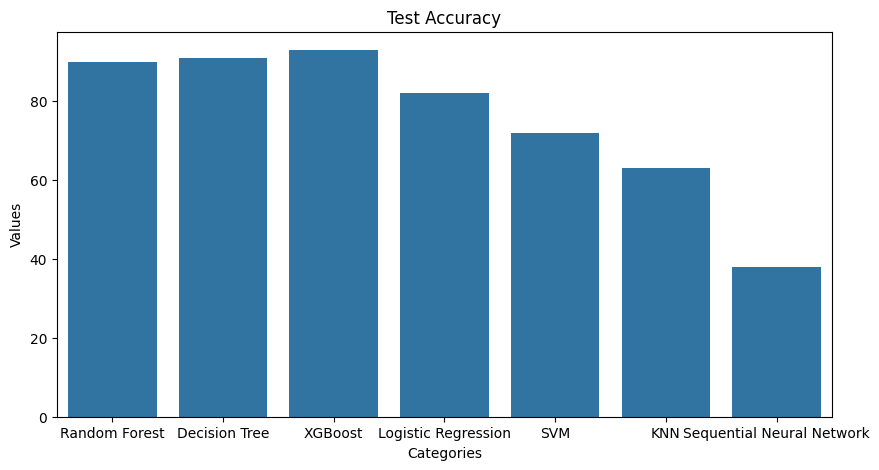

In [236]:
# comparison of models with their test accuracy
categories=['Random Forest','Decision Tree','XGBoost','Logistic Regression','SVM','KNN','Sequential Neural Network']
values=[90,91,93,82,72,63,38]

plt.figure(figsize=(10,5))
sns.barplot(x=categories,y=values)
plt.title('Test Accuracy')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

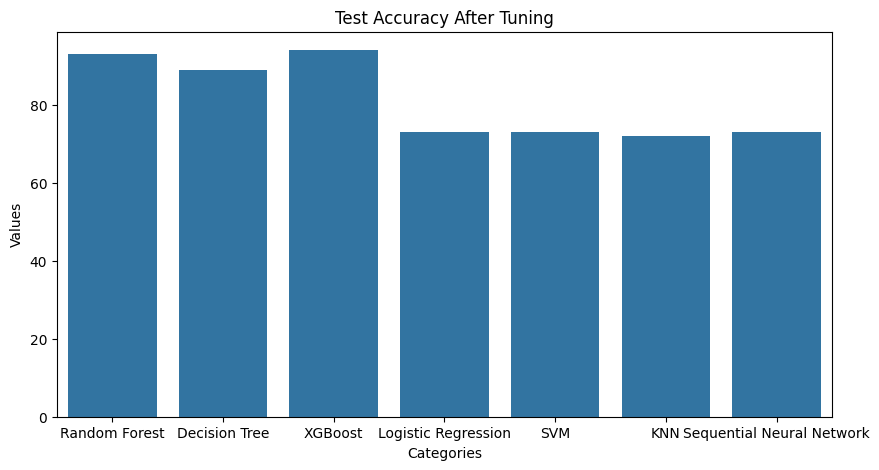

In [239]:
# comparison of tuned models with their test accuracy
categories=['Random Forest','Decision Tree','XGBoost','Logistic Regression','SVM','KNN','Sequential Neural Network']
values=[93,89,94,73,73,72,73]
plt.figure(figsize=(10,5))
sns.barplot(x=categories,y=values)
plt.title('Test Accuracy After Tuning')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Model Saving

The XGBoost model achieved the best fit among all the models achieving the greatest test scores and closest train and test score. Hence we are taking the hyperparameter tuned XGBoost model and save it to xgb_best.sav to use it to evaluate our test dataset prepared while data preprocessing.

In [240]:
import joblib

In [243]:
joblib.dump(best_grid_xgb,'xgb_best.sav')

['xgb_best.sav']